In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('fulldataplustrainmastersynthetic.csv',low_memory = False)#read full data dxi
df=df.iloc[:,:]
# df = df.sample(n=500000)
df

,primary,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Ad_CTR,Ad_CPC,Ad_Spend,...,Category_Clothing,Category_Electronics,Category_Home Appliances,Category_Toys,Region_Asia,Region_Europe,Region_North America,Conversion_Rate_state,composite_dxi_label,composite_dxi
0,3155,102,0.07,1215.58,23,23,1.0,0.0800,1.57,125.60,...,0,1,0,0,0,0,1,1,0,3.913005
1,4388,181,0.18,697.75,31,31,1.0,0.1233,0.86,106.04,...,1,0,0,0,0,1,0,1,0,4.733713
2,6949,97,0.20,520.03,17,17,1.0,0.1069,0.93,99.42,...,0,1,0,0,0,1,0,1,0,3.765504
3,7481,153,0.24,73.71,44,44,1.0,0.0660,0.78,51.48,...,0,0,0,0,0,0,1,1,0,3.928639
4,12492,173,0.02,1338.60,40,40,1.0,0.1592,0.70,111.44,...,0,0,1,0,0,0,1,1,0,4.555465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,99309,162,0.05,37.68,0,208,0.0,0.1128,1.49,168.07,...,1,0,0,0,1,0,0,0,0,5.487834
3778,99510,168,0.20,565.66,0,243,0.0,0.1037,0.78,80.89,...,1,0,0,0,1,0,0,0,0,5.146142
3779,99517,153,0.00,939.92,0,486,0.0,0.1909,1.76,335.98,...,0,0,0,0,1,0,0,0,0,6.137088
3780,99644,159,0.22,1419.16,1,470,0.0,0.0295,0.84,24.78,...,0,0,1,0,1,0,0,0,0,4.165047


In [5]:
tv='Conversion_Rate'

In [7]:
f1=df.loc[(df['composite_dxi'] > df['composite_dxi'].mean()) & (df[tv] == 1)]
print('Number of instances goodQ above SXI: ',len(f1))
f2=df.loc[(df['composite_dxi'] > df['composite_dxi'].mean()) & (df[tv] == 0)]
print('Number of instances badQ above SXI: ',len(f2))
f3=df.loc[(df['composite_dxi'] < df['composite_dxi'].mean()) & (df[tv] == 1)]
print('Number of instances goodQ below SXI: ',len(f3))
f4=df.loc[(df['composite_dxi'] < df['composite_dxi'].mean()) & (df[tv] == 0)]
print('Number of instances badQ below SXI: ',len(f4))

Number of instances goodQ above SXI:  161
Number of instances badQ above SXI:  1543
Number of instances goodQ below SXI:  0
Number of instances badQ below SXI:  2078


In [9]:
def chkdelin(tv,df1,sxi,selcls,twds,clas1,clas2,classes):
#Count of class1 in above SXI
    d1=df1.loc[(df1['composite_dxi'] >= sxi) & (df1[tv] == 1)]
    #Count of class0 in above SXI
    d2=df1.loc[(df1['composite_dxi'] >= sxi) & (df1[tv] == 0)]
    #Count of class1 in below SXI
    d3=df1.loc[(df1['composite_dxi'] < sxi) & (df1[tv] == 1)]
    #Count of class0 in below SXI
    d4=df1.loc[(df1['composite_dxi'] < sxi) & (df1[tv] == 0)]
    uy = selcls+twds
    if uy == 'cls1abv' or uy == 'cls2bel':
        clas1fnl = (len(d1)/(len(d1) +len(d2)))*100
        clas2fnl = (len(d4)/(len(d3) +len(d4)))*100 
        clsafnl = (len(d1)/len(df1[tv]))*100
        clsbfnl = (len(d4)/len(df1[tv]))*100
        print(f'{classes[1]} Above SXI: {clas1fnl}')
        print(f'{classes[0]} Below SXI: {clas2fnl}')
        print()
        print(f'{classes[1]} Above SXI: {clsafnl} of {clas1}')
        print(f'{classes[0]} Below SXI: {clsbfnl} of {clas2}')
    else:
        clas1fnl = (len(d2)/(len(d1) +len(d2)))*100
        clas2fnl = (len(d3)/(len(d3) +len(d4)))*100 
        clsafnl = (len(d2)/len(df1[tv]))*100
        clsbfnl = (len(d3)/len(df1[tv]))*100
        print(f'{classes[0]} Above SXI: {clas2fnl}')
        print(f'{classes[1]} Below SXI: {clas1fnl}')
        print()
        print(f'{classes[0]} Above SXI: {clsbfnl} of {clas2}')
        print(f'{classes[1]} Below SXI: {clsafnl} of {clas1}')

In [31]:
chkdelin(tv,df,0.97,'cls1','abv',49.82,50.18,['Good','Bad'])

Bad Above SXI: 4.607899255867201
Good Below SXI: 100.0

Bad Above SXI: 4.257006874669487 of 49.82
Good Below SXI: 7.615018508725542 of 50.18


In [34]:
len(f1)/(len(f1) +len(f2)) # GoodQ% in above SXI

0.09448356807511737

In [36]:
len(f3)/(len(f3) +len(f4)) # GoodQ% in below SXI

0.0

In [38]:
df[tv].value_counts()[1]/len(df)

0.04257006874669487

In [40]:
df[tv].value_counts()

Conversion_Rate
0.0    3621
1.0     161
Name: count, dtype: int64

In [44]:
# import plotly.express as px
# lo = px.histogram(df, x='checkout_price', nbins=100, title="Histogram").update_layout(
#         title="Histogram", xaxis=dict(title='checkout_price'), yaxis=dict(title="Frequency"),
#         template='simple_white').update_traces(
#         marker_color = '#490074',
#         marker_line_color = 'black',
#         marker_line_width = 1, opacity = 1)
# lo

Conversion_Rate
['rgb(141,211,199)', 'rgb(255,255,179)', 'rgb(190,186,218)', 'rgb(251,128,114)', 'rgb(128,177,211)', 'rgb(253,180,98)', 'rgb(179,222,105)', 'rgb(252,205,229)', 'rgb(217,217,217)', 'rgb(188,128,189)', 'rgb(204,235,197)', 'rgb(255,237,111)']


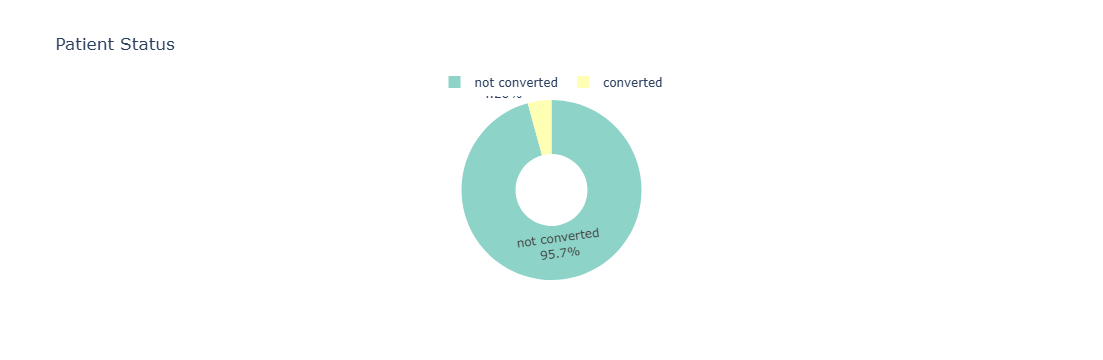

In [29]:
import plotly.express as px
from plotly.offline import plot
def tvdist(df,tv,b):
    tv_value_count = df[tv].value_counts()
    colors = px.colors.qualitative.Set3
    print(tv)
    print(colors)
    hover_text = [f"{tv}: {status}<br>Count: {count}" for status, count in tv_value_count.items()]
    try:
        nms=[b[int(i)] for i in list(tv_value_count.index)]
    except:
        nms=[i for i in list(tv_value_count.index)]
    order_status_fig = px.pie(
        names=nms,
        values=tv_value_count.values,
        title=f'Patient Status',
        hole=0.4,
        labels={'label':tv, 'value':'Count'},
        color_discrete_sequence=colors,
    #     hover_data={tv: [b[i] for i in list(tv_value_count.index)], 'Count': tv_value_count.values},
        hover_name=nms,
    )

    order_status_fig.update_traces(
    textinfo='percent+label'

    )

    order_status_fig.update_layout(
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5),
    )
    order_status_fig.show()
    plot(order_status_fig, filename='tvdist.html')
        
    
tvdist(df,tv,['not converted','converted'])

In [ ]:
df = df.drop('Q37',axis=1)
df

In [21]:
df[tv].mean()

654.4788177339902

In [46]:
#df = df.drop(['Unnamed: 0','userid'], axis = 1)
composite_dxi1=df['composite_dxi']
yy=df[tv]

avg_composite_dxi=np.mean(np.array(composite_dxi1))
avg_composite_dxi


3.1795647851142212

In [62]:
composite_dxi1

0       3.913005
1       4.733713
2       3.765504
3       3.928639
4       4.555465
          ...   
3777    5.487834
3778    5.146142
3779    6.137088
3780    4.165047
3781    4.689365
Name: composite_dxi, Length: 3782, dtype: float64

In [48]:
df['composite_dxi'].min()

-0.3152760580814588

In [54]:
bin_edges = [0,1,4,7,8,13,16]
bin_labels = [1,4,7,8,13,16]

# Create a new column 'Rainfall_Bucket' based on binning
df['netqyty_Bucket'] = pd.cut(df['composite_dxi'], bins=bin_edges, labels=bin_labels, right=False)

In [58]:
average_nqy = df.groupby('netqyty_Bucket')[[tv,'netqyty_Bucket']]
average_nqy

C:\Users\Prabhat\AppData\Local\Temp\ipykernel_4700\4210710816.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [60]:
average_nqy()

TypeError: 'DataFrameGroupBy' object is not callable

In [39]:
average_nqy.fillna(0,inplace=True)

In [40]:
average_nqy = average_nqy.reset_index()
average_nqy

,netqyty_Bucket,Combustion Temperature (Tcomb) (°C)
0,1,0.000000
1,4,747.663529
2,7,741.115789
3,8,514.625000
4,13,561.921918
5,16,560.516667


In [41]:
index_to_insert = 3
new_row = {'netqyty_Bucket': 6.74, tv: 654.48}
dss= pd.concat([average_nqy.loc[:index_to_insert - 1], pd.DataFrame([new_row]), average_nqy.loc[index_to_insert:]]).reset_index(drop=True)

In [42]:
dss

,netqyty_Bucket,Combustion Temperature (Tcomb) (°C)
0,1.00,0.000000
1,4.00,747.663529
2,7.00,741.115789
3,6.74,654.480000
4,8.00,514.625000
5,13.00,561.921918
6,16.00,560.516667


In [43]:
dss.drop([0,2,4],inplace=True)

In [44]:
conv_ratee = list(dss[tv])
mean_dxi = list(dss['netqyty_Bucket']) 
conv_ratee,mean_dxi

([747.6635294117647, 654.48, 561.9219178082192, 560.5166666666667],
 [4.0, 6.74, 13.0, 16.0])

In [ ]:
20, 37.65,55.31

In [ ]:
conv_ratee,mean_dxi

In [ ]:
(10863-(10863*0.4469))

In [ ]:
2173, 4090, 6008

In [ ]:
conv_ratee,mean_dxi

In [ ]:
conv_ratee = [100.0, 46.09, 32.1757757993829]
mean_dxi = [0.9989887633584712, 1.07, 1.246108110411082]

In [ ]:
mean_dxi.insert(1,1.58)
conv_ratee.insert(1,24.22)

In [85]:
# mean_dxi[0] = 8.05
conv_ratee[0] = 8.45

# --------------------------------- SKIP BELOW GO TO CURVE FIT------------------------------

# Kmeans Start here - for classification target variable

In [ ]:
from sklearn.cluster import KMeans
# clusters = kmeans.elbow_value_
clusters =2
composite_dxi=np.array(composite_dxi1).reshape(-1, 1)  
kmeans = KMeans(n_clusters = clusters,random_state=0) 

kmeans.fit(composite_dxi) 
  
print((kmeans.labels_))

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(composite_dxi1,kmeans.labels_ ,c=kmeans.labels_.astype(float),cmap='viridis') 
plt.xlabel("composite dxi") 
plt.ylabel("kmeans label") 
plt.title("kmeans of composite dxi ") 
plt.show() 
#plt.savefig('kmeans_comp_dxi.png')

np.unique((kmeans.labels_),return_counts=True)

In [ ]:
np.unique(kmeans.labels_)

In [ ]:
v,c=np.unique(kmeans.labels_ , return_counts=True)

def index_value(y_train,n):
        index_value=[]
        for i in range(len(y_train)):
            if (y_train[i] == n):
              
                index_value.append(i)
        return index_value
    
buyers=index_value(list(yy),1)  # Put Good class or Class to be maximized (can be either 0 or 1)
non_buyers=index_value(list(yy),0) # Put Bad class or Class to be minimized (can be either 0 or 1)

kmean_label=kmeans.labels_


km_buyer=[]
for i in range(len(buyers)):
    km_buyer.append(kmean_label[buyers[i]])
    
km_non=[]
for i in range(len(non_buyers)):
    km_non.append(kmean_label[non_buyers[i]])


v,c1=np.unique(km_buyer , return_counts=True)
v_non,c_non1=np.unique(km_non , return_counts=True)


buy=c1
no_buyer=c_non1

buyer=[]
non_buyer=[]
vv=[]
nn=[]
for i in range(len(buy)):
    buyer.append(buy[i])

#buy=list(buy)
for i in range(clusters):
    vv.append(i)
    if i not in v:
        buyer.insert(i,0)
        
for i in range(len(no_buyer)):
    non_buyer.append(no_buyer[i])
    
for i in range(clusters):
    nn.append(i)
    if i not in v_non:
        non_buyer.insert(i,0)
buyer_conv = (np.array(buyer)/len(composite_dxi1))*100  

buyer_per=(buyer/(buyer+ (np.array(non_buyer))))*100





In [ ]:
buyer_conv

In [ ]:
no_buyer

In [ ]:
buyer_per

# # Analysis

In [ ]:
def index_value(y_train,n):
        index_value=[]
        for i in range(len(y_train)):
            if (y_train[i] == n):
              
                index_value.append(i)
        return index_value
    
xx=[]  
cluster_index=[]
for i in range(clusters):
    c1=index_value(kmean_label,i)
    cdx1=composite_dxi[c1]
    xx.append(cdx1)
    cluster_index.append(c1)
    
minimum_dxi=[]
maximum_dxi=[]
avg_dxi=[]
for i in range(len(xx)):
    minimum_dxi.append(np.min(xx[i]))
    maximum_dxi.append(np.max(xx[i]))
    avg_dxi.append(np.mean(xx[i]))


# Target Conversion Plot

In [ ]:
def conv_rate(avg_dxi,buyer_conv):
    dxi_sort=list(np.sort(avg_dxi))
    idx=[]
   
    for i in range(len(dxi_sort)):
        a=avg_dxi.index(dxi_sort[i])
        idx.append(a)
    
    buyer_c=buyer_conv[idx]

    conv_rate=[]
    convv=0
    for i in range(len(dxi_sort)):
       
        conv=convv+buyer_c[i]
        #print(conv)
        conv_rate.append(conv)
        convv=conv
    return dxi_sort,conv_rate

mean_dxi,conv_ratee=conv_rate(minimum_dxi,buyer_conv)  

In [86]:
conv_ratee

[8.45, 11.51, 16.826808510638298, 18.7, 19.615000000000002, 24.4]

In [87]:
mean_dxi

[4.0, 8.08, 10.0, 14.0, 16.0, 17.0]

# ---------------------------CurveFit--------------------------------------

In [45]:
import matplotlib.pyplot as plt
import numpy as np
mymodel = np.poly1d(np.polyfit(mean_dxi, conv_ratee, 1))

myline = np.linspace(min(composite_dxi1), max(composite_dxi1), 100)


In [46]:
help(np.poly1d)

Help on class poly1d in module numpy:

class poly1d(builtins.object)
 |  poly1d(c_or_r, r=False, variable=None)
 |  
 |  A one-dimensional polynomial class.
 |  
 |  .. note::
 |     This forms part of the old polynomial API. Since version 1.4, the
 |     new polynomial API defined in `numpy.polynomial` is preferred.
 |     A summary of the differences can be found in the
 |     :doc:`transition guide </reference/routines.polynomials>`.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2

In [47]:
import numpy

# Polynomial Regression
def polyfits(x, y, degree):
    results = {}
    
    coeffs = numpy.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)# or [p(z) for z in x]
    print('y_pred: ',yhat)
    from sklearn.metrics import r2_score
    r2 = r2_score(y,yhat)
    print('R-squared: ',r2_score(y,yhat))
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results,coeffs
results,coeffs = polyfits(mean_dxi, conv_ratee, 1)

y_pred:  [722.27357202 680.20266396 584.08445796 538.02141995]
R-squared:  0.9036236108405784


In [ ]:
coeffs

In [ ]:
y = 46.09*0.8
y

In [ ]:
x = (y - coeffs[-1]) / coeffs[-2]
x

In [ ]:
help(numpy.polyfit)

In [ ]:
o = 1.07
y =  (coeffs[0]*o) - (coeffs[1]) 
y

In [ ]:
ya =[83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634  ]
xa = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,
       1.32951458]

In [ ]:
x_reshaped = xa
y =ya
# Fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_reshaped, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Given y
given_y =  6.171634

# Solve for x using the equation y = mx + c
given_x = (given_y - intercept) / slope

print("Corresponding x value:", given_x)

In [ ]:
slope

In [ ]:
intercept

In [ ]:
ya = 46.09

In [ ]:
df['composite_dxi'].mean() 36 , -48

In [ ]:
 mymodel(myline)

In [ ]:
myline

In [ ]:
dicts = {'FINISHED': 1, 'INCOMPLETE': 0}
list(dicts.keys())

In [ ]:
a ='iui'
if 'ui' in a:
    print(True)

In [ ]:
208/599

In [ ]:
599*0.2

In [ ]:
120*0.35

In [ ]:
120-42

In [ ]:
myline[:]

In [ ]:
def find_nearest_values(number, num_list):
    # Calculate absolute differences between the given number and each element in the list
    absolute_differences = [abs(number - x) for x in num_list]
    
    # Find the minimum absolute difference
    min_difference = min(absolute_differences)
    
    # Find the indices of elements with the minimum absolute difference
    nearest_indices = [i for i, diff in enumerate(absolute_differences) if diff == min_difference]
    
    # Create a list of nearest values
    nearest_values = [(num_list[i],i) for i in nearest_indices]
    index = nearest_values[-1]
    
    return nearest_values[-1][0],nearest_values[-1][1]

# Example usage:
number_to_find = 60
my_list =  mymodel(myline)

nearest_values,index = find_nearest_values(number_to_find, my_list)
print("Nearest values to", number_to_find, "are:", nearest_values)


In [ ]:
myline[:7]

In [ ]:
df[tv].mean()*0.8

In [ ]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Conversion Rate vs DXI')
ax.plot((myline)[:], mymodel(myline)[:],'y') 

# ax.scatter(df['composite_dxi'].mean(), df[tv].mean(), marker='o',label = 'Current Squared Error & SXI')
# ax.scatter([2],[50813.06], marker='x',color = 'red',label = 'Target total CO2 emissions(Kilotons) & SXI') #Labelling Target SXI
ax.ticklabel_format(useOffset=False,style='plain')
plt.grid(b=True, which='major', color='black', linestyle='-')
 
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='blue', linestyle='-', alpha=0.2)

plt.title("Correlation graph: Squared Error & SXI")
plt.legend(loc='upper left')
plt.xlabel("SXI")
plt.ylabel("Squared Error")
#plt.savefig('conv_dxi.png')

In [67]:
mean_dxi,conv_ratee

([4.0, 8.08, 10.0, 14.0, 16.0, 17.0],
 [10.625, 11.51, 16.826808510638298, 18.7, 19.615000000000002, 24.4])

In [ ]:
61.74*0.64

In [ ]:
1-0.36

In [49]:
myline

array([ 1.7660297 ,  1.90853915,  2.05104861,  2.19355806,  2.33606752,
        2.47857697,  2.62108642,  2.76359588,  2.90610533,  3.04861479,
        3.19112424,  3.33363369,  3.47614315,  3.6186526 ,  3.76116206,
        3.90367151,  4.04618096,  4.18869042,  4.33119987,  4.47370933,
        4.61621878,  4.75872823,  4.90123769,  5.04374714,  5.1862566 ,
        5.32876605,  5.4712755 ,  5.61378496,  5.75629441,  5.89880387,
        6.04131332,  6.18382277,  6.32633223,  6.46884168,  6.61135114,
        6.75386059,  6.89637005,  7.0388795 ,  7.18138895,  7.32389841,
        7.46640786,  7.60891732,  7.75142677,  7.89393622,  8.03644568,
        8.17895513,  8.32146459,  8.46397404,  8.60648349,  8.74899295,
        8.8915024 ,  9.03401186,  9.17652131,  9.31903076,  9.46154022,
        9.60404967,  9.74655913,  9.88906858, 10.03157803, 10.17408749,
       10.31659694, 10.4591064 , 10.60161585, 10.7441253 , 10.88663476,
       11.02914421, 11.17165367, 11.31416312, 11.45667257, 11.59

In [48]:
mymodel(myline)[:]

array([756.57472499, 754.38658552, 752.19844605, 750.01030659,
       747.82216712, 745.63402765, 743.44588819, 741.25774872,
       739.06960925, 736.88146978, 734.69333032, 732.50519085,
       730.31705138, 728.12891192, 725.94077245, 723.75263298,
       721.56449352, 719.37635405, 717.18821458, 715.00007512,
       712.81193565, 710.62379618, 708.43565672, 706.24751725,
       704.05937778, 701.87123832, 699.68309885, 697.49495938,
       695.30681992, 693.11868045, 690.93054098, 688.74240152,
       686.55426205, 684.36612258, 682.17798312, 679.98984365,
       677.80170418, 675.61356472, 673.42542525, 671.23728578,
       669.04914632, 666.86100685, 664.67286738, 662.48472792,
       660.29658845, 658.10844898, 655.92030952, 653.73217005,
       651.54403058, 649.35589112, 647.16775165, 644.97961218,
       642.79147272, 640.60333325, 638.41519378, 636.22705432,
       634.03891485, 631.85077538, 629.66263591, 627.47449645,
       625.28635698, 623.09821751, 620.91007805, 618.72

In [ ]:
j = (myline).tolist() + [3.12]
k = mymodel(myline).tolist() + [33.5]
k

In [125]:
conv_ratee[1]*0.825

9.49575

In [116]:
1-0.6825

0.3175

In [129]:
1-0.825

0.17500000000000004

Text(0, 0.5, 'Holding Time (thold) (mins)')

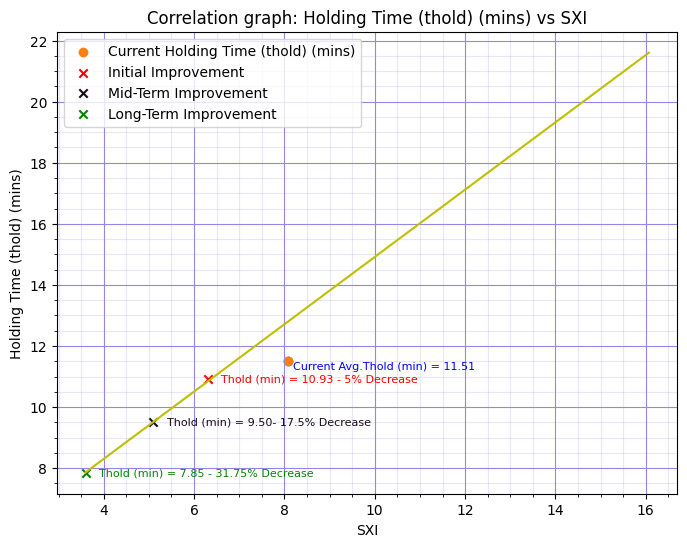

In [139]:
import matplotlib.pyplot as plt
 

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(8, 6))
#fig.suptitle('Con7version Rate vs DXI')
ax.plot((myline)[:], mymodel(myline)[:],'y') 

ax.scatter(mean_dxi[1], conv_ratee[1], marker='o')
ax.scatter(8.08, conv_ratee[1], marker='o',label= f'Current {tv}')
plt.text(8.2, conv_ratee[1], str(f'Current Avg.Thold (min) = {conv_ratee[1]}'), ha='left', va='top',fontsize=8, color='blue')

ax.scatter([6.3],[10.93], marker='x',color = 'red',label = 'Initial Improvement') #Labelling Target SXI
plt.text(6.6, 10.93, str(f'Thold (min) = 10.93 - 5% Decrease'), ha='left', va='center',fontsize=8, color='red')

ax.scatter([5.1],[9.50], marker='x',color = '#170b16',label = 'Mid-Term Improvement')#Labelling Target SXI
plt.text(5.4, 9.5 , str(f'Thold (min) = 9.50- 17.5% Decrease'), ha='left', va='center',fontsize=8, color='#170b16')


ax.scatter([3.6],[7.85], marker='x',color = '#078200',label = 'Long-Term Improvement')#Labelling Target SXI
plt.text(3.9, 7.85, str(f'Thold (min) = 7.85 - 31.75% Decrease'), ha='left', va='center',fontsize=8, color='#078200')


plt.grid(which='major', color='#9585e6', linestyle='-')

# plt.axvline(x=mean_dxi[0], color='blue' ,label='Current Good Quality Samples(%) & SXI',ymax=0.42,ymin=0)
# plt.axhline(y=conv_ratee[0], color='blue',xmax=0.42,xmin=0)
# plt.axvline(x=13.95, color='red',label = 'Initial Improvement',ymax=0.5,ymin=0)
# plt.axhline(y=27.54, color='red',xmax=0.5,xmin=0)
# plt.axvline(x=14.92, color='#170b16',label = 'Mid-Term Improvement',ymax=0.7,ymin=0)
# plt.axhline(y=39.88, color='#170b16',xmax=0.7,xmin=0)
# plt.axvline(x=16.05, color='#078200',label = 'Long-Term Improvement',ymax=0.95,ymin=0)
# plt.axhline(y=54.18, color='#078200',xmax=0.95,xmin=0)
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid( which='minor', color='#9585e6', linestyle='-', alpha=0.2)

plt.title(f'Correlation graph: {tv} vs SXI')
plt.legend(loc='upper left')#fig.legend(loc='outside right upper')
plt.xlabel("SXI")
plt.ylabel(f'{tv}')
#plt.savefig('conv_dxi.png')

In [ ]:
50*1.2956

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
scatter_trace = go.Scatter(
    x=[mean_dxi[1]],
    y=[conv_ratee[1]],
    mode='markers',
    marker=dict(size=10, symbol='circle',color='blue'),
    name='Current Not a Backorder Rate & SXI',
    hovertemplate='<b>Current SXI: %{x:.2f}</b><br><b>Current Backorder_Rate: %{y:.2f}</b>'
    
)

line_trace = go.Scatter(
    x=myline,
    y=mymodel(myline),
    mode='lines',
    line=dict(color='red', width=2),
    name = 'SXI vs Backorders',
    hovertemplate='<b>SXI: %{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>'
)

layout = go.Layout(
    title="Correlation graph: Not a Backorder Rate (%) & SXI",
    xaxis=dict(
        title="SXI",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=1,           # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    yaxis=dict(
        title="Not a Backorder Rate (%)",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=10,          # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    legend=dict(x=0, y=1.01),
    margin=dict(l=60, r=20, t=70, b=60),
#     hovermode='x unified',
)
fig = go.Figure(data=[scatter_trace1,line_trace], layout=layout)

fig.update_traces(hoverlabel=dict(namelength=1))
fig.update_layout(plot_bgcolor='rgb(215, 252, 225)')
# fig.update_traces(hovertemplate='<b>SXI:%{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>')
fig.show()

In [ ]:
scatter_trace1 = go.Scatter(
    x=[mean_dxi[1]],
    y=[conv_ratee[1]],
    mode='markers',
    marker=dict(size=10, symbol='circle',color='blue'),
    name='Current Not a Backorder Rate & SXI',
    hovertemplate='<b>Current SXI: %{x:.2f}</b><br><b>Current Backorder_Rate: %{y:.2f}</b>'
    
)
scatter_trace2 = go.Scatter(
    x=[4.03],
    y=[85.86],
    mode='markers',
    marker=dict(size=10, symbol='x',color="green"),
    name='Target Not a Backorder Rate & SXI',
    hovertemplate='<b>Target SXI: %{x:.2f}</b><br><b>Target Backorder_Rate: %{y:.2f}</b>'
)
line_trace = go.Scatter(
    x=myline,
    y=mymodel(myline),
    mode='lines',
    line=dict(color='red', width=2),
    name = 'SXI vs Backorders',
    hovertemplate='<b>SXI: %{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>'
)

layout = go.Layout(
    title="Correlation graph: Not a Backorder Rate (%) & SXI",
    xaxis=dict(
        title="SXI",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=1,           # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    yaxis=dict(
        title="Not a Backorder Rate (%)",
        showgrid=True,    # Show major grid lines
        gridcolor='rgba(0, 0, 0, 1)',  # Black color with transparency
        showline=True,    # Show axis line
        dtick=10,          # Set the tick interval for minor grid lines
        minor=dict(showgrid=True, gridcolor='rgba(128, 128, 128, 0.4)')
    ),
    legend=dict(x=0, y=1.01),
    margin=dict(l=60, r=20, t=70, b=60),
#     hovermode='x unified',
)
fig = go.Figure(data=[scatter_trace1,scatter_trace2, line_trace], layout=layout)

fig.update_traces(hoverlabel=dict(namelength=1))
fig.update_layout(plot_bgcolor='rgb(215, 252, 225)')
# fig.update_traces(hovertemplate='<b>SXI:%{x:.2f}</b><br><b>Backorder_Rate: %{y:.2f}</b>')
fig.show()

In [ ]:
mean_dxi,conv_ratee

In [ ]:
#4FFFB0
#32de84
#4FFFB0
#20B2AA
#00FF00
#66CDAA
# 215, 252, 225 LIGHT1
# 203, 247, 215 LIGHT

In [ ]:
myline # sxi

In [ ]:
mymodel(myline) # target outcome rate - not a bacckorder rate

In [ ]:
78.274 + 5

In [ ]:
ty = pd.read_csv('Airline_Reviews.csv',low_memory=False)
ty

In [ ]:
ty['Route'].value_counts()

In [ ]:
mymodel = [83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634 ]

myline = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,1.32951458]

In [ ]:
tv = 'Readmission rate'

In [ ]:
currsxi = 1.07
currconv= 46.09

In [ ]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()


line_trace = go.Scatter(x=myline, y=mymodel, mode='lines', line=dict(color='#C99700', width=2), name=f'SXI ', hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+tv +': %{y:.2f}</b>')
fig.add_trace(line_trace)
# Assuming myline, mymodel, mean_dxi, conv_ratee, x, y, and tv are defined
# Add traces
# fig.add_trace(go.Scatter(x=myline[:], y=mymodel[:], mode='lines', line=dict(color='#C99700')))#, name='Conversion Rate'
fig.add_trace(go.Scatter(x=[currsxi], y=[currconv], mode='markers', marker=dict(color='blue', symbol='circle'), name=f'Current {tv}'))

x1 = 1.18  # initial
y1 = 46.09 * .9  # initial
x2 = 1.33  # long term
y2 = mymodel[-1]  # long term

# Define annotations
initial_term = {'color': 'red', 'symbol': 'x', 'name': f'Initial {tv}', 'x': x1, 'y': y1, 'per':10,'lab':'Initial '}
long_term = {'color': '#078200', 'symbol': 'x', 'name': f'Long-term {tv}', 'x': x2, 'y': y2,'per':88,'lab':'Long-Term '}
current = {'color': 'blue', 'symbol': 'x', 'name': f'Current {tv}', 'x': currsxi, 'y': currconv,'per':88,'lab':'Current '}

# Add shapes and annotations for "Initial", "Long-term", and "Current"
shapes = [initial_term, long_term, current]

for shape in shapes:
  fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x'), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +tv +': %{y:.2f}%</b>'))
  fig.add_shape(type='line', x0=shape['x'], x1=shape['x'], y0=0, y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
  fig.add_shape(type='line', x0=1, x1=shape['x'], y0=shape['y'], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
  if shape['name'] == f'Initial {tv}':  
        ay_value = -32  
  else:
      ay_value = -40 
  fig.add_annotation(
      x=shape['x'], y=shape['y'],
      text=f'{shape["name"]}= {shape["per"]:.2f}%',
      showarrow=True,
      arrowhead=2,
      arrowcolor=shape['color'],
      font=dict(color=shape['color']),
      ax=0,  
      ay=ay_value  
  )

mid_term = {
    'x': (x1 + x2) / 2,
    'y': (y1 + y2) / 2,
    'color': '#170b16',
    'dash': 'dashdot',
    'name': f'Mid-term {tv}',
    'per': 50,
    'lab':'Mid-Term '}

fig.add_trace(go.Scatter(x=[mid_term['x']], y=[mid_term['y']], mode='markers', marker=dict(color=mid_term['color'], symbol='x'), name=mid_term['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+mid_term['lab']  +tv +': %{y:.2f}%</b>'))
fig.add_shape(type='line', x0=mid_term['x'], x1=mid_term['x'], y0=0, y1=mid_term['y'], line=dict(color=mid_term['color'], dash=mid_term['dash']), name=mid_term['name'])
fig.add_shape(type='line', x0=1, x1=mid_term['x'], y0=mid_term['y'], y1=mid_term['y'], line=dict(color='#170b16', dash='dashdot'), name='Mid-Term Improvement')
fig.add_annotation(
        x=mid_term['x'], y=mid_term['y'], 
        text=f'{mid_term["name"]}= {mid_term["per"]:.2f}%', 
        showarrow=True, 
        arrowhead=2, 
        arrowcolor=mid_term['color'], 
        font=dict(color=mid_term['color']),
        ax=0,  # No horizontal movement
        ay=-40  # Arrow points up
    )



# Update layout
layout = go.Layout(
    autosize=True,
    title="Correlation graph",
    xaxis=dict(
        title="SXI",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),

    yaxis=dict(
        title=f"{tv} %",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),
    showlegend=True,
    # legend=dict(x=0, y=1.01),
    legend=dict(yanchor="top",
    xanchor="left",
    ),
    margin=dict(l=60, r=20, t=70, b=60),
    
)

fig.update_layout(layout,)

fig.show()

In [ ]:
for i in shapes:
    print(i['lab'])

In [ ]:
mymodel = [ 0.        ,  0.84847642,  1.69695283,  2.54542925,  3.39390566,
        4.24238208,  5.09085849,  5.93933491,  6.78781132,  7.63628774,
        8.48476415,  9.33324057, 10.18171698, 11.0301934 , 11.87866981,
       12.72714623, 13.57562265, 14.42409906, 15.27257548, 16.12105189,
       16.96952831, 17.81800472, 18.66648114, 19.51495755, 20.36343397,
       21.21191038, 22.0603868 , 22.90886321, 23.75733963, 24.60581604,
       25.45429246, 26.30276887, 27.15124529, 27.99972171, 28.84819812,
       29.69667454, 30.54515095, 31.39362737, 32.24210378, 33.0905802 ,
       33.93905661, 34.78753303, 35.63600944, 36.48448586, 37.33296227,
       38.18143869, 39.0299151 , 39.87839152, 40.72686794, 41.57534435,
       42.42382077, 43.27229718, 44.1207736 , 44.96925001, 45.81772643,
       46.66620284, 47.51467926, 48.36315567, 49.21163209, 50.0601085 ,
       50.90858492, 51.75706133, 52.60553775, 53.45401416, 54.30249058,
       55.150967  , 55.99944341, 56.84791983, 57.69639624, 58.54487266,
       59.39334907, 60.24182549, 61.0903019 , 61.93877832, 62.78725473,
       63.63573115, 64.48420756, 65.33268398, 66.18116039, 67.02963681,
       67.87811323, 68.72658964, 69.57506606, 70.42354247, 71.27201889,
       72.1204953 , 72.96897172, 73.81744813, 74.66592455, 75.51440096,
       76.36287738, 77.21135379, 78.05983021, 78.90830662, 79.75678304,
       80.60525945, 81.45373587, 82.30221229, 83.1506887 , 83.99916512]

In [ ]:
model_myline = [83.06346701, 77.93734481, 72.81122261, 67.68510041, 62.55897821,
       57.43285601, 52.30673381, 47.18061161, 42.05448941, 36.92836721,
       31.80224501, 26.67612281, 21.55000061, 16.42387841, 11.2977562 ,
        6.171634 ]

myline = [1.00536885, 1.02697856, 1.04858828, 1.07019799, 1.09180771,
       1.11341742, 1.13502714, 1.15663686, 1.17824657, 1.19985629,
       1.221466  , 1.24307572, 1.26468543, 1.28629515, 1.30790486,1.32951458]

In [ ]:
avg_composite_dxi = 1.16
coeffs = [-237.21377941,  321.55081145]
ylab = 'Readmission Rate'
import plotly

In [ ]:
outyp = 'bad'
perc_chang = 10
currout = 46.09
# else:
#     target_out = (df[tv].value_counts()[bad]/len(df))*100

def reverse_equation(y, m, c):
    return (y-c)/m

target_out = currout * (1-(perc_chang/100))

target_out = round(target_out, 2)

target_sxi = reverse_equation(target_out, coeffs[-2], coeffs[-1])
# target_out,index = find_nearest_values(target_out, model_myline)
# target_sxi = round(myline[index],2)
pchg = ((target_out - currout)/currout)*100
if coeffs[-2] < 0:
    rltyp = 'Negative'
    xpos = max(myline)
    ypos = max(model_myline)
else:
    xpos = min(myline)
    ypos = max(model_myline)
    rltyp = 'Positive'

if coeffs[-1] < 0:
    equation_str = f"y = {coeffs[-2]:.2f}x - {abs(coeffs[-1]):.2f}"
else:
    equation_str = f"y = {coeffs[-2]:.2f}x + {abs(coeffs[-1]):.2f}"
print(f"Equation of the linear line as a string:{equation_str}")

import plotly.express as px
import plotly.graph_objects as go
# if outyp == 'good':
#     lab = f'{tv}_{mapping[good]}'
# else:
#     lab = f'{tv}_{mapping[bad]}'
# # if corr == 'Positive':
#     lab = f'{tv}_{mapping[good]}'
# else:
#     lab = f'{tv}_{mapping[bad]}'

fig = go.Figure()
line_trace = go.Scatter(x=myline, y=model_myline, mode='lines', line=dict(color='#C99700', width=2), name=f'SXI vs {ylab}', hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+ylab +': %{y:.2f}</b>')
fig.add_trace(line_trace)

# fig.add_trace(go.Scatter(x=myline[:], y=mymodel[:], mode='lines', line=dict(color='#C99700')))#, name='Conversion Rate'
fig.add_trace(go.Scatter(x=[avg_composite_dxi], y=[currout], mode='markers', marker=dict(color='blue', symbol='circle'), name=f'Current {ylab}'))

# x1 = 4.55  # initial
# y1 = 39.9  # initial

y2 = min(model_myline)  # long term
x2 = reverse_equation(y2, coeffs[-2], coeffs[-1])# long term
lt = round(((y2 - currout)/currout)*100,2)

initial_term = {'color': 'red', 'symbol': 'x', 'name': f'Initial Improvement', 'x': target_sxi, 'y': target_out, 'per':pchg,'lab':'Initial '}
long_term = {'color': '#078200', 'symbol': 'x', 'name': f'Long-Term Improvement', 'x': x2, 'y': y2,'per':lt,'lab':'Long-Term '}
current = {'color': 'blue', 'symbol': 'x', 'name': f'Current {ylab}', 'x': avg_composite_dxi, 'y': currout,'per':0,'lab':'Current '}

# Add shapes and annotations for "Initial", "Long-term", and "Current"
shapes = [initial_term, long_term, current]

for shape in shapes:
    if shape['per'] == 0:
        fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x',size=8), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +ylab +': %{y:.2f}%</b>'))
    else:
        text=f'{shape["name"]}: {abs(shape["per"]):.2f}% Decrease'
        fig.add_trace(go.Scatter(x=[shape['x']], y=[shape['y']], mode='markers', marker=dict(color=shape['color'], symbol='x',size=8), name=shape['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+shape['lab']  +ylab +': %{y:.2f}%</b><br><b>'+text))

    # fig.add_shape(type='line', x0=shape['x'], x1=shape['x'], y0=model_myline[0], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
    # fig.add_shape(type='line', x0=myline[-1], x1=shape['x'], y0=shape['y'], y1=shape['y'], line=dict(color=shape['color'], dash='dash'), name=shape['name'])
    if shape['name'] == f'Initial {ylab}':
        ay_value = -32  
    else:
        ay_value = -40
    # if shape['per'] == 0: 
    #     fig.add_annotation(
    #         x=shape['x'], y=shape['y'],
    #         text=f'{shape["name"]}= {shape["y"]:.2f}%',
    #         showarrow=True,
    #         arrowhead=2,
    #         arrowcolor=shape['color'],
    #         font=dict(color=shape['color']),
    #         ax=0,  
    #         ay=ay_value  
    #     )
    # else:
    #     fig.add_annotation(
    #         x=shape['x'], y=shape['y'],
    #         text=f'{shape["name"]}= {shape["per"]:.2f}% Decrease',
    #         showarrow=True,
    #         arrowhead=2,
    #         arrowcolor=shape['color'],
    #         font=dict(color=shape['color']),
    #         ax=0,  
    #         ay=ay_value  
    #     )

mt =  ((((target_out + y2) / 2) - currout)/currout)*100
mid_term = {
    'x': reverse_equation((target_out + y2) / 2, coeffs[-2], coeffs[-1]),
    'y': (target_out + y2) / 2,
    'color': '#170b16',
    'dash': 'dashdot',
    'name': f'Mid-Term Improvement',
    'per': mt,
    'lab':'Mid-Term '}

text=f'{mid_term["name"]}: {abs(mid_term["per"]):.2f}% Decrease'
fig.add_trace(go.Scatter(x=[mid_term['x']], y=[mid_term['y']], mode='markers', marker=dict(color=mid_term['color'], symbol='x',size=8), name=mid_term['name'],hovertemplate='<b>SXI: %{x:.2f}</b><br><b>'+mid_term['lab']  +ylab +': %{y:.2f}%</b><br><b>'+text))
# fig.add_shape(type='line', x0=mid_term['x'], x1=mid_term['x'], y0=model_myline[0], y1=mid_term['y'], line=dict(color=mid_term['color'], dash=mid_term['dash']), name=mid_term['name'])
# fig.add_shape(type='line', x0=myline[-1], x1=mid_term['x'], y0=mid_term['y'], y1=mid_term['y'], line=dict(color='#170b16', dash='dashdot'), name='Mid-Term Improvement')
# fig.add_annotation(
#         x=mid_term['x'], y=mid_term['y'], 
#         , 
#         showarrow=True, 
#         arrowhead=2, 
#         arrowcolor=mid_term['color'], 
#         font=dict(color=mid_term['color']),
#         ax=0,  
#         ay=-40 
#     )
fig.add_annotation(

    x=xpos,  
    y=ypos, 
    text=f'<b>Line Equation</b><br>{equation_str}',   # Your custom text
    showarrow=False,
    font=dict(
        size=12,
        color="black"  # Customize font color
    ),
    align="center",
    bgcolor="white",  # Background color for the annotation
    bordercolor="black",  # Border color for the annotation
    borderpad=4  # Padding around the text
)
# Update layout
layout = go.Layout(
    autosize=True,
    title=f'Correlation Graph: SXI vs {ylab}',
    xaxis=dict(
        title="SXI (x)",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),

    yaxis=dict(
        title=f"{ylab} (y)",
        showgrid=True,
        gridcolor='#9585e6',  # gridcolor with transparency
        showline=True,
        minor=dict(showgrid=True, gridcolor='rgba(149, 133, 230, 0.4)')
    ),
    showlegend=True,
    # legend=dict(x=0, y=1.01),
    legend=dict(yanchor="top",
    xanchor="left",
    ),
    margin=dict(l=60, r=20, t=70, b=60),

)

fig.update_layout(layout)
corrloc = fig.to_html(full_html=False, default_height='400px', default_width='100%')
plotly.offline.plot(fig, filename='corrl.html', auto_open=False)

In [ ]:
fig

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
(myline)[40:], mymodel(myline)[40:],
# Assuming you have your data in X and y
# conv_ratee,mean_dxi
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array((myline)[40:]).reshape(-1, 1),  mymodel(myline)[40:], test_size=0.2, random_state=42)

# Transforming features to include polynomial terms up to degree 3

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared
r2 = r2_score(y_t, y_pred)
print("R-squared:", r2)


In [ ]:
mean_dxi.to_array()